<a href="https://colab.research.google.com/github/MHusni1604/KKN-Periode-2/blob/main/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===📦 Paket bawaan===
import os
import random
import shutil

# ===📊 Data dan visualisasi===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===🖼️ Pemrosesan gambar===
from PIL import Image
import cv2

# ===🤖 TensorFlow & Keras===
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D,
    Dense, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
)
from tensorflow.keras import Input
from keras.layers import TFSMLayer

# ===🧪 Utilities===
from sklearn.model_selection import train_test_split

# ===🌐 Kaggle Hub===
import kagglehub

In [2]:
path = kagglehub.dataset_download("huberthamelin/garbage-classification-labels-corrections")

print("Path to dataset files:", path)

100%|██████████| 497M/497M [00:05<00:00, 91.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/huberthamelin/garbage-classification-labels-corrections/versions/4


In [3]:
os.listdir(path)

['labels_corrections.csv',
 'garbage_classification_enhanced',
 'garbage_classification_corrected']

In [4]:
os.listdir(os.path.join(path, 'garbage_classification_enhanced'))

['metal',
 'shoes',
 'cardboard',
 'clothes',
 'biological',
 'brown-glass',
 'trash',
 'green-glass',
 'plastic',
 'white-glass',
 'battery',
 'paper']

In [5]:
folder = os.path.join(path, 'garbage_classification_enhanced')

class_names = os.listdir(folder)
print(class_names)

['metal', 'shoes', 'cardboard', 'clothes', 'biological', 'brown-glass', 'trash', 'green-glass', 'plastic', 'white-glass', 'battery', 'paper']


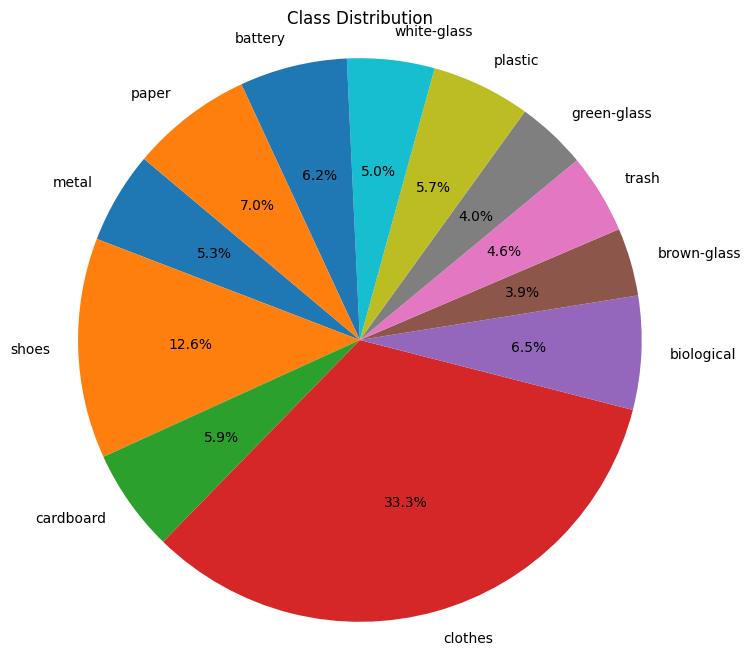

In [6]:
class_counts = []
for class_name in class_names:
    class_counts.append(len(os.listdir(os.path.join(folder, class_name))))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

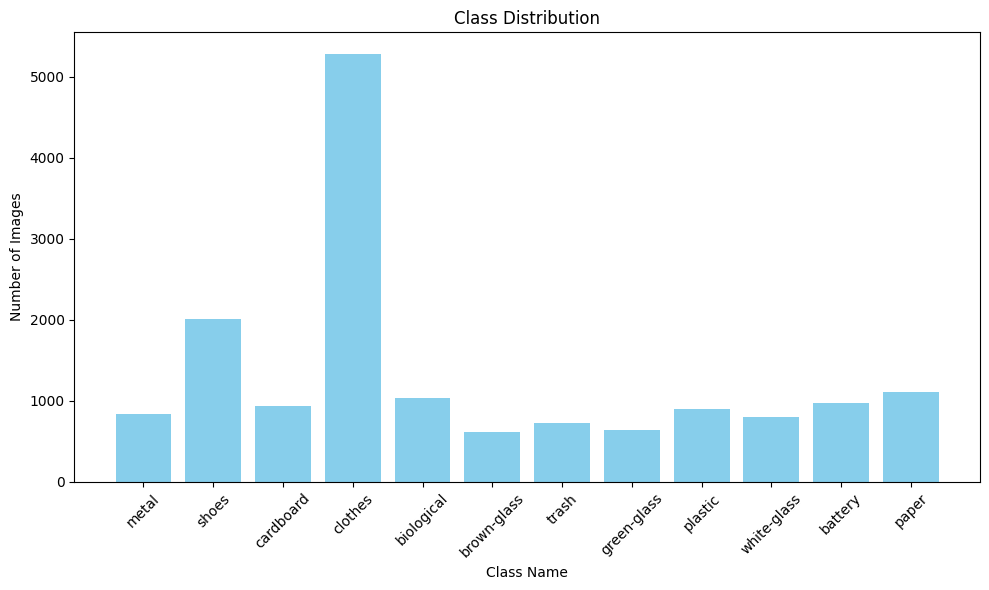

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

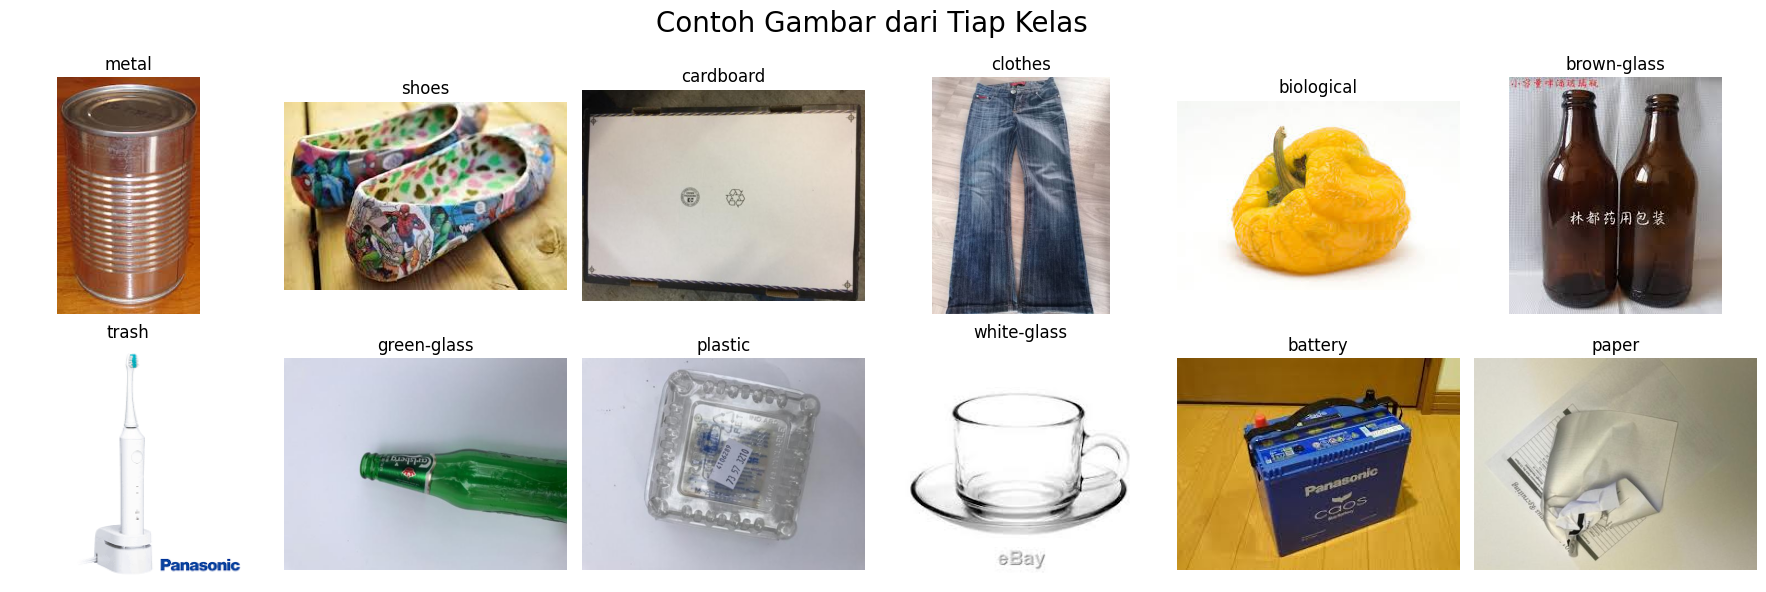

In [8]:
n_classes = len(class_names)
n_rows = 2
n_cols = int(np.ceil(n_classes / n_rows))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
axs = axs.flatten()  # ubah ke 1D array supaya mudah di-loop

for ax, class_name in zip(axs, class_names):
    image_paths = []
    for folder in [folder]:
        path = os.path.join(folder, class_name)
        if os.path.exists(path):
            image_paths += [os.path.join(path, img) for img in os.listdir(path)]

    if image_paths:
        img = cv2.cvtColor(cv2.imread(random.choice(image_paths)), cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(class_name)
    ax.axis('off')

plt.suptitle("Contoh Gambar dari Tiap Kelas", fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
category_map = {
    'battery': 'b3',
    'biological': 'organik',
    'paper': 'daur_ulang',
    'cardboard': 'daur_ulang',
    'plastic': 'daur_ulang',
    'metal': 'daur_ulang',
    'white-glass': 'daur_ulang',
    'brown-glass': 'daur_ulang',
    'green-glass': 'daur_ulang',
    'clothes': 'residu',
    'shoes': 'residu',
    'trash': 'residu'
}

In [10]:
source_root = folder  # folder awal
target_root = 'dataset_kategori'  # folder baru setelah digabungkan

os.makedirs(target_root, exist_ok=True)

for old_class, new_class in category_map.items():
    old_path = os.path.join(source_root, old_class)
    new_path = os.path.join(target_root, new_class)
    os.makedirs(new_path, exist_ok=True)

    for file in os.listdir(old_path):
        src = os.path.join(old_path, file)
        dst = os.path.join(new_path, f"{old_class}_{file}")  # prefix agar tahu asalnya
        shutil.copy(src, dst)

In [11]:
new_class = os.listdir(os.path.join('dataset_kategori'))
print(new_class)

['b3', 'residu', 'daur_ulang', 'organik']


In [12]:
# Konfigurasi
source_dir = 'dataset_kategori'
target_dir = 'dataset_split'
split_ratio = {'train': 0.7, 'val': 0.15, 'test': 0.15}

# Buat folder tujuan
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, split, class_name), exist_ok=True)

# Bagi gambar
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n = len(images)
    n_train = int(n * split_ratio['train'])
    n_val = int(n * split_ratio['val'])

    train_files = images[:n_train]
    val_files = images[n_train:n_train + n_val]
    test_files = images[n_train + n_val:]

    for split, files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        for file in files:
            src = os.path.join(class_path, file)
            dst = os.path.join(target_dir, split, class_name, file)
            shutil.copy(src, dst)

print("✅ Dataset berhasil dibagi menjadi train, val, dan test.")

✅ Dataset berhasil dibagi menjadi train, val, dan test.


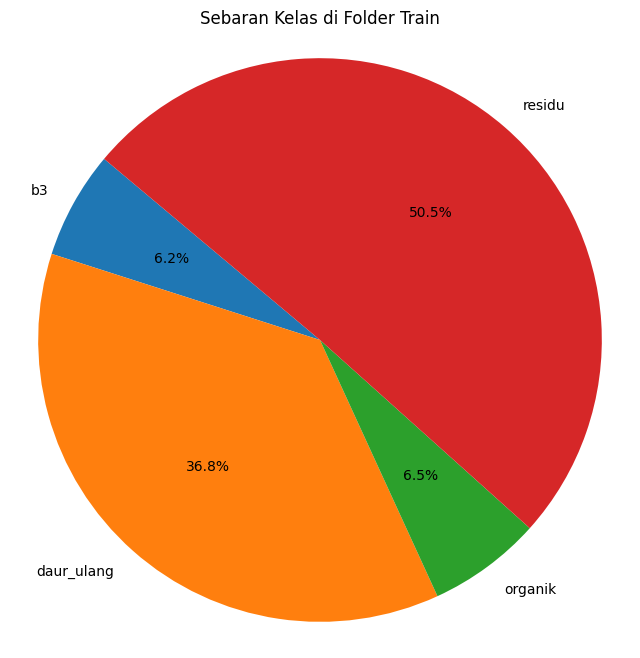

In [13]:
train_dir = 'dataset_split/train'

class_names = sorted(os.listdir(train_dir))  # nama folder kelas
class_counts = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    class_counts.append(count)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Kelas di Folder Train')
plt.axis('equal')
plt.show()

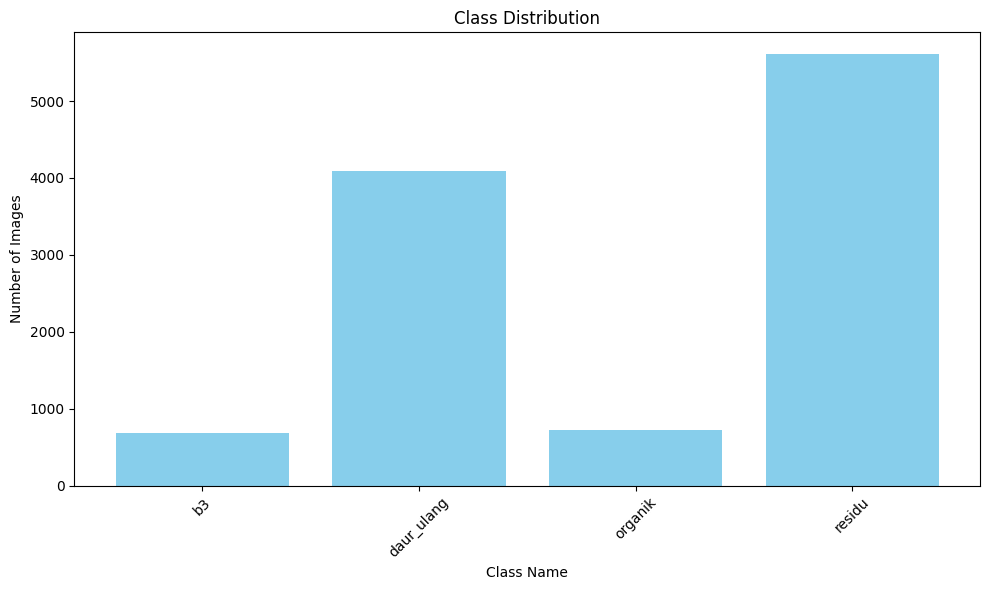

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# # Path ke data latih setelah split
# train_dir = os.path.join(target_dir, 'train')

# # Dapatkan jumlah gambar per kelas
# class_counts = {}
# for class_name in os.listdir(train_dir):
#     class_path = os.path.join(train_dir, class_name)
#     class_counts[class_name] = len(os.listdir(class_path))

# # Cari jumlah gambar minimum (kelas minoritas)
# min_count = min(class_counts.values())

# # Lakukan under sampling: kurangi jumlah gambar kelas mayoritas
# for class_name in os.listdir(train_dir):
#     class_path = os.path.join(train_dir, class_name)
#     images = os.listdir(class_path)

#     if len(images) > min_count:
#         # Acak dan ambil sejumlah min_count gambar
#         random.shuffle(images)
#         images_to_keep = images[:min_count]
#         images_to_remove = set(images) - set(images_to_keep)

#         # Hapus gambar yang tidak termasuk yang akan disimpan
#         for img in images_to_remove:
#             os.remove(os.path.join(class_path, img))

# print("✅ Under sampling selesai pada data latih.")

In [16]:
train_dir = '/content/dataset_split/train'

class_counts = {}
total_count = 0

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_count += count

# Tampilkan hasil
print("📊 Jumlah gambar per kelas di TRAIN:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count} gambar")

print(f"\n🧮 Total gambar di set TRAIN: {total_count} gambar")

📊 Jumlah gambar per kelas di TRAIN:
  b3: 685 gambar
  daur_ulang: 4086 gambar
  organik: 724 gambar
  residu: 5612 gambar

🧮 Total gambar di set TRAIN: 11107 gambar


In [17]:
base_dir = 'dataset_split'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 11107 images belonging to 4 classes.
Found 2385 images belonging to 4 classes.
Found 2378 images belonging to 4 classes.


In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ambil label kelas dari train generator
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

# Ambil label aktual (dalam bentuk angka)
y_train = train_gen.classes

# Hitung class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Bentuk dalam format dictionary
class_weights = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weights)

Class Weights: {np.int32(0): np.float64(4.053649635036496), np.int32(1): np.float64(0.6795766030347529), np.int32(2): np.float64(3.8352900552486187), np.int32(3): np.float64(0.494787954383464)}


In [19]:
class StopTrainingAtAccuracy(Callback):
    def __init__(self, acc_threshold=0.95, val_acc_threshold=0.95):
        super(StopTrainingAtAccuracy, self).__init__()
        self.acc_threshold = acc_threshold
        self.val_acc_threshold = val_acc_threshold

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")
        if acc is not None and val_acc is not None:
            if acc >= self.acc_threshold and val_acc >= self.val_acc_threshold:
                print(f"\n Target tercapai! Akurasi dan val_akurasi >= {self.acc_threshold * 100:.0f}%")
                self.model.stop_training = True

In [20]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Inisialisasi base model DenseNet121
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)
base_model.trainable = False  # Bekukan base model saat tahap awal training

# Bangun model secara Sequential
model = Sequential([
    InputLayer(input_shape=(150, 150, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
callback = [
    StopTrainingAtAccuracy(),
    ModelCheckpoint('model_checkpoint.keras', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
]

history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=callback,
    class_weight=class_weights,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5108 - loss: 1.4609
Epoch 1: val_loss improved from inf to 0.38101, saving model to model_checkpoint.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 141s 326ms/step - accuracy: 0.5111 - loss: 1.4597 - val_accuracy: 0.8574 - val_loss: 0.3810
Epoch 2/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7774 - loss: 0.5105
Epoch 2: val_loss improved from 0.38101 to 0.29531, saving model to model_checkpoint.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 92s 225ms/step - accuracy: 0.7774 - loss: 0.5103 - val_accuracy: 0.8898 - val_loss: 0.2953
Epoch 3/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8343 - loss: 0.3864
Epoch 3: val_loss improved from 0.29531 to 0.24230, saving model to model_checkpoint.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 80s 231ms/step - accuracy: 0.8343 - loss: 0.3864 - val_accuracy: 0.9075 - val_loss: 0.2423
Epoch 4/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8566 - loss: 0.3291
Epoch 4: val_loss 

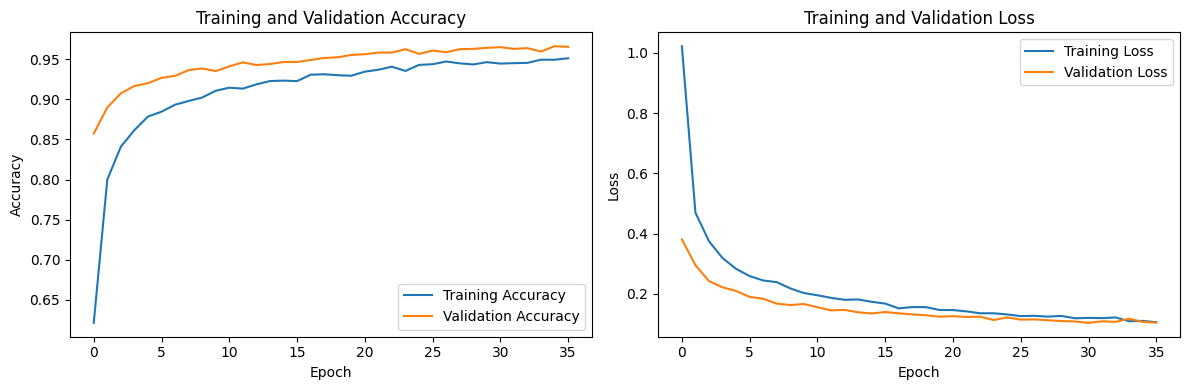

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
loss, acc = model.evaluate(test_gen)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.9717 - loss: 0.0830
Test Loss: 0.0823, Test Accuracy: 0.9702


In [24]:
from sklearn.metrics import classification_report
import numpy as np

# Langkah 1: Dapatkan ground truth dan prediksi dari val/test generator
# Misal pakai test_gen
test_gen.reset()
pred_probs = model.predict(test_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

# Langkah 2: Ambil nama kelas
class_labels = list(test_gen.class_indices.keys())

# Langkah 3: Cetak classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step
              precision    recall  f1-score   support

          b3       0.05      0.06      0.06       148
  daur_ulang       0.37      0.36      0.36       877
     organik       0.08      0.08      0.08       156
      residu       0.51      0.50      0.51      1204

    accuracy                           0.40      2385
   macro avg       0.25      0.25      0.25      2385
weighted avg       0.40      0.40      0.40      2385



In [25]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [26]:
model.save("/content/my_model.keras")

In [27]:
model.save("/content/my_model.h5")

In [28]:
!tensorflowjs_converter \
    --input_format=keras \
    my_model.h5 \
    tfjs_model/

2025-07-02 17:39:08.264867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751477948.285488   13740 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751477948.291961   13740 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [29]:
from google.colab import files

!zip -r tfjs_model.zip tfjs_model
files.download("tfjs_model.zip")

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard2of7.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of7.bin (deflated 7%)
  adding: tfjs_model/group1-shard7of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard1of7.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 97%)
  adding: tfjs_model/group1-shard5of7.bin (deflated 7%)
  adding: tfjs_model/group1-shard6of7.bin (deflated 6%)
  adding: tfjs_model/group1-shard4of7.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# SavedModel (untuk TFLite & TFJS)
model.export('/content//saved_model')

# TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model')
tflite_model = converter.convert()
with open('/content/model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/content//saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_427')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  138892623910416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623912144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623909648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623910800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623911568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623908688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623912720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623909072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892623912528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138892539147664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13889

In [31]:
!zip -r saved_model.zip saved_model
files.download("saved_model.zip")

  adding: saved_model/ (stored 0%)
  adding: saved_model/saved_model.pb (deflated 92%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 79%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/fingerprint.pb (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>